In [392]:
import albumentations as al
import cv2 as cv
import data_extraction as dx
import matplotlib.pyplot as plt
import data_preparation as dp
import utils as ut

In [18]:
def show(img):
    plt.figure(figsize=(3,3))
    plt.imshow(img, cmap="gray")
    plt.axis("off")
    plt.show()

In [590]:
data = []
labels = []
dx.loadDataset("/home/lenin/Downloads/DATASET_IA", data, labels)

loading data set
loading current dir: B
loading current dir: H
loading current dir: 0
loading current dir: Q
loading current dir: V
loading current dir: 9
loading current dir: A
loading current dir: K
loading current dir: 4
loading current dir: 5
loading current dir: E
loading current dir: 2
loading current dir: G
loading current dir: 7
loading current dir: M
loading current dir: U
loading current dir: Y
loading current dir: I
loading current dir: W
loading current dir: Z
loading current dir: D
loading current dir: P
loading current dir: N
loading current dir: S
loading current dir: F
loading current dir: 1
loading current dir: 6
loading current dir: 3
loading current dir: L
loading current dir: C
loading current dir: X
loading current dir: R
loading current dir: 8
loading current dir: O
loading current dir: J
loading current dir: T
loading data set - done


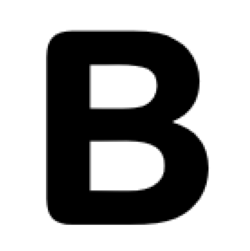

B


In [378]:
show(data[0])
print(labels[0])

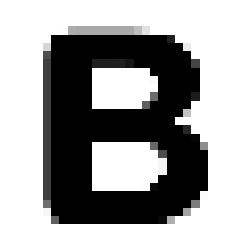

In [379]:
dp.resizeData(data, 28)
show(data[0])

In [584]:
transform = al.Compose([
    al.CLAHE(),
    # al.RandomRotate90(),
    # al.Transpose(),
    al.ShiftScaleRotate(shift_limit=0.05, scale_limit=0.01, rotate_limit=15, p=.8, border_mode=cv.BORDER_DEFAULT),
    # al.Blur(blur_limit=3),
    al.OpticalDistortion(),
    al.GridDistortion(),
    # al.HueSaturationValue(),
])

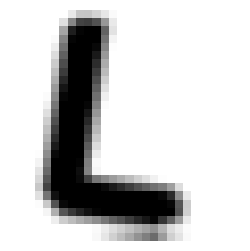

In [583]:
img = data[-80]
_, img = cv.threshold(img, 0, 255, cv.THRESH_OTSU)
new = transform(image=img)["image"]

show(new)

In [591]:
augmentation_per_img = 10
new_data = data[:]
new_labels = labels[:]
for i in range(len(data)):
    current = data[i]
    _, current = cv.threshold(current, 0, 255, cv.THRESH_OTSU)
    for __ in range(augmentation_per_img):
        new_img = transform(image=current)["image"]
        new_data.append(new_img)
        new_labels.append(labels[i])

In [596]:
def augmentation(data, labels, augmentation_per_img)->(data,labels):
    new_data = data[:]
    new_labels = labels[:]
    for i in range(len(data)):
        current = data[i]
        _, current = cv.threshold(current, 0, 255, cv.THRESH_OTSU)
        for __ in range(augmentation_per_img):
            new_img = transform(image=current)["image"]
            new_data.append(new_img)
            new_labels.append(labels[i])
    return new_data, new_labels

3960


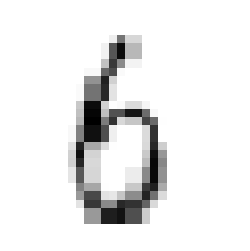

6


In [587]:
print(len(new_data))
show(new_data[-1000])
print(new_labels[-1000])

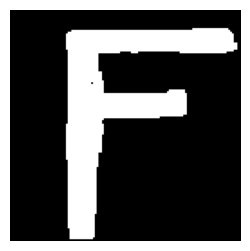

In [592]:
dp.binarizeData(new_data)
show(new_data[-1000])

In [593]:
dx.writeDataset("/home/lenin/Downloads/new_dataset", new_data, new_labels)

create empty dir
create empty dir - done
writting dataset
writting dir: B
writting dir: H
writting dir: 0
writting dir: Q
writting dir: V
writting dir: 9
writting dir: A
writting dir: K
writting dir: 4
writting dir: 5
writting dir: E
writting dir: 2
writting dir: G
writting dir: 7
writting dir: M
writting dir: U
writting dir: Y
writting dir: I
writting dir: W
writting dir: Z
writting dir: D
writting dir: P
writting dir: N
writting dir: S
writting dir: F
writting dir: 1
writting dir: 6
writting dir: 3
writting dir: L
writting dir: C
writting dir: X
writting dir: R
writting dir: 8
writting dir: O
writting dir: J
writting dir: T
writting dataset - done


In [595]:
data_original = ut.loadData("data_bin")
labels_original = ut.loadData("labels")

In [597]:
data1, labels1 = augmentation(data_original, labels_original, 10)

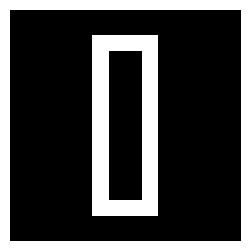

In [601]:
dp.binarizeData(data1)
show(data1[0])

In [602]:
data1.extend(new_data)
labels1.extend(new_labels)

In [605]:
dx.writeDataset("dataset/augmented", data1, labels1)

create empty dir
create empty dir - done
writting dataset
writting dir: 0
writting dir: 1
writting dir: 2
writting dir: 3
writting dir: 4
writting dir: 5
writting dir: 6
writting dir: 7
writting dir: 8
writting dir: 9
writting dir: A
writting dir: B
writting dir: C
writting dir: D
writting dir: E
writting dir: F
writting dir: G
writting dir: H
writting dir: I
writting dir: J
writting dir: K
writting dir: L
writting dir: M
writting dir: N
writting dir: O
writting dir: P
writting dir: Q
writting dir: R
writting dir: S
writting dir: T
writting dir: U
writting dir: V
writting dir: W
writting dir: X
writting dir: Y
writting dir: Z
writting dataset - done


In [606]:
ut.saveData("augmented_data", data1)
ut.saveData("augmented_labels", labels1)